# Import Library & Dataset

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv('milk.csv')
print(dataset)

      pH  Temprature  Taste  Odor  Fat   Turbidity  Colour Grade
0    8.5          70      1     1     1          1     246   low
1    9.5          34      1     1     0          1     255   low
2    5.5          45      1     0     1          1     250   low
3    4.5          60      0     1     1          1     250   low
4    8.1          66      1     0     1          1     255   low
..   ...         ...    ...   ...   ...        ...     ...   ...
667  6.8          36      0     1     1          0     253  high
668  6.8          45      0     1     1          1     255  high
669  6.6          35      0     1     1          1     255  high
670  6.6          35      0     1     1          1     255  high
671  6.6          45      0     1     1          1     250  high

[672 rows x 8 columns]


# Data Preprocessing

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          672 non-null    float64
 1   Temprature  672 non-null    int64  
 2   Taste       672 non-null    int64  
 3   Odor        672 non-null    int64  
 4   Fat         672 non-null    int64  
 5   Turbidity   672 non-null    int64  
 6   Colour      672 non-null    int64  
 7   Grade       672 non-null    object 
dtypes: float64(1), int64(6), object(1)
memory usage: 42.1+ KB


In [5]:
# Mengubah nilai grade ke dalam angka
grade_mapping = {'low': 1, 'medium': 2, 'high': 3}
dataset['Grade'] = dataset['Grade'].map(grade_mapping)
print(dataset)

      pH  Temprature  Taste  Odor  Fat   Turbidity  Colour  Grade
0    8.5          70      1     1     1          1     246      1
1    9.5          34      1     1     0          1     255      1
2    5.5          45      1     0     1          1     250      1
3    4.5          60      0     1     1          1     250      1
4    8.1          66      1     0     1          1     255      1
..   ...         ...    ...   ...   ...        ...     ...    ...
667  6.8          36      0     1     1          0     253      3
668  6.8          45      0     1     1          1     255      3
669  6.6          35      0     1     1          1     255      3
670  6.6          35      0     1     1          1     255      3
671  6.6          45      0     1     1          1     250      3

[672 rows x 8 columns]


In [6]:
dataset.rename(columns={'Temprature': 'Temperature'}, inplace=True)

# Exploratory Data Analysis

In [7]:
dataset.describe()

,pH,Temperature,Taste,Odor,Fat,Turbidity,Colour,Grade
count,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000
mean,6.608185,46.401786,0.523810,0.380952,0.626488,0.532738,251.973214,1.392857
std,1.754817,11.837418,0.499805,0.485983,0.484097,0.499299,4.252030,0.549062
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000,1.000000
25%,5.600000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000,1.000000
50%,6.700000,43.000000,1.000000,0.000000,1.000000,1.000000,255.000000,1.000000
75%,8.100000,50.000000,1.000000,1.000000,1.000000,1.000000,255.000000,2.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000,3.000000


array([[<AxesSubplot:title={'center':'pH'}>,
        <AxesSubplot:title={'center':'Temperature'}>,
        <AxesSubplot:title={'center':'Taste'}>],
       [<AxesSubplot:title={'center':'Odor'}>,
        <AxesSubplot:title={'center':'Fat '}>,
        <AxesSubplot:title={'center':'Turbidity'}>],
       [<AxesSubplot:title={'center':'Colour'}>,
        <AxesSubplot:title={'center':'Grade'}>, <AxesSubplot:>]],
      dtype=object)

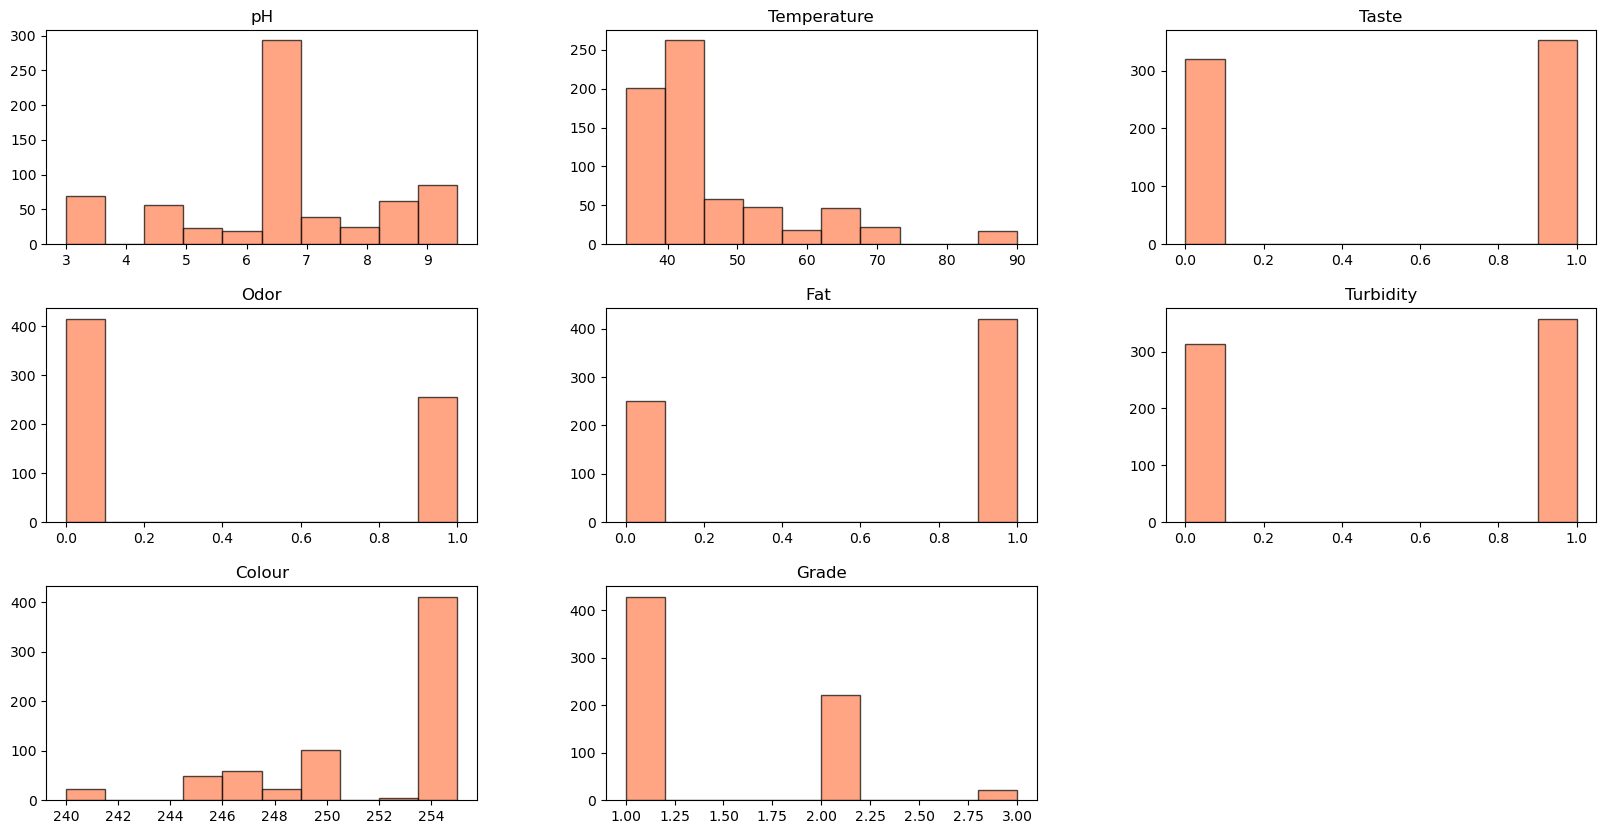

In [8]:
user_data_for_hist = \
dataset
user_data_for_hist.hist(figsize = (20, 10), alpha = 0.7, color = '#ff7f50', edgecolor = 'black', grid = False)

# Splitting Data & Normalization

In [9]:
from sklearn.preprocessing import MinMaxScaler
# Memisahkan fitur (X) dan target (y)
X = dataset.drop('Grade', axis = 1)  # Menghapus kolom 'Grade' sebagai target
y = dataset['Grade']

# split dataset 80, 20
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2, random_state = 3)

# Normalisasi data
scaler = MinMaxScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

# Random Sampling

In [10]:
from collections import Counter
print(f'Original: {Counter(y)}')

Original: Counter({1: 429, 2: 222, 3: 21})


In [11]:
#random over sampling
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(xtrain, ytrain)
print(f'Over sampling: {Counter(y_ros)}')

Over sampling: Counter({2: 337, 1: 337, 3: 337})


In [12]:
#random under sampling
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(xtrain, ytrain)
print(f'Under sampling: {Counter(y_rus)}')

Under sampling: Counter({1: 17, 2: 17, 3: 17})


In [13]:
#kombinasi ros dan rus
over = RandomOverSampler(sampling_strategy = {1 : 337,
         2 : 337,
         3 : 337})
under = RandomUnderSampler(sampling_strategy = {1 : 17,
         2 : 17,
         3 : 17})

X_over, y_over = over.fit_resample(xtrain, ytrain)

X_comb, y_comb = under.fit_resample(X_over, y_over)

print(f"Combined Random Sampling: {Counter(y_comb)}")

Combined Random Sampling: Counter({1: 17, 2: 17, 3: 17})


In [14]:
# Tomek Links Random Sampling
from imblearn.under_sampling import TomekLinks

tl = TomekLinks()
x_tom, y_tom = tl.fit_resample(xtrain, ytrain)
print(f"Tomek Links Random Sampling: {Counter(y_tom)}")

Tomek Links Random Sampling: Counter({1: 337, 2: 183, 3: 17})


# Modeling

In [15]:
from mord import LogisticIT
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## a. Logit Ordinal
### Model 1 - Logit Ordinal dengan dataset Asli

In [16]:
# Membuat model logistik ordinal dengan dataset asli
model1 = LogisticIT()

# Melatih model pada data pelatihan yang sudah dinormalisasi
model1.fit(xtrain, ytrain)

# Prediksi pada data pelatihan dan data pengujian
train_predictions1 = model1.predict(xtrain)
test_predictions1 = model1.predict(xtest)
print('Model 1 - Logit Ordinal dengan dataset Asli'.center(55, '='), '\n')

# Evaluasi kinerja model pada data pelatihan
train_accuracy1 = accuracy_score(ytrain, train_predictions1)
train_classification_rep1 = classification_report(ytrain, train_predictions1)
train_confusion_matrix1 = confusion_matrix(ytrain, train_predictions1)

print("Kinerja Data Training:".center(55, '-'))
print("Akurasi Training:", train_accuracy1)
print("Laporan Klasifikasi Training:\n", train_classification_rep1)
print("Matriks Konfusi Data Training:\n", train_confusion_matrix1, '\n')

# Evaluasi kinerja model pada data pengujian
test_accuracy1 = accuracy_score(ytest, test_predictions1)
test_classification_rep1 = classification_report(ytest, test_predictions1)
test_confusion_matrix1 = confusion_matrix(ytest, test_predictions1)

print("Kinerja Data Testing:".center(55, '-'))
print("Akurasi Testing:", test_accuracy1)
print("Laporan Klasifikasi Testing:\n", test_classification_rep1)
print("Matriks Konfusi Data Testing:\n", test_confusion_matrix1)

======Model 1 - Logit Ordinal dengan dataset Asli====== 

-----------------Kinerja Data Training:----------------
Akurasi Training: 0.9366852886405959
Laporan Klasifikasi Training:
               precision    recall  f1-score   support

           1       0.92      0.99      0.96       337
           2       0.97      0.92      0.94       183
           3       0.00      0.00      0.00        17

    accuracy                           0.94       537
   macro avg       0.63      0.64      0.63       537
weighted avg       0.91      0.94      0.92       537

Matriks Konfusi Data Training:
 [[335   2   0]
 [ 15 168   0]
 [ 14   3   0]] 

-----------------Kinerja Data Testing:-----------------
Akurasi Testing: 0.9407407407407408
Laporan Klasifikasi Testing:
               precision    recall  f1-score   support

           1       0.95      1.00      0.97        92
           2       0.92      0.90      0.91        39
           3       0.00      0.00      0.00         4

    accuracy     

C:\Users\MUFFID\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MUFFID\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MUFFID\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MUFFID\anaconda3\lib\site-packages\sklearn\

### Model 2 - Logit Ordinal dengan dataset Over Sampling

In [17]:
# Membuat model logistik ordinal dengan dataset over sampling
model2 = LogisticIT()

# Melatih model pada data pelatihan yang sudah dinormalisasi
model2.fit(X_ros, y_ros)

# Prediksi pada data pelatihan dan data pengujian
train_predictions2 = model2.predict(X_ros)
test_predictions2 = model2.predict(xtest)
print('Model 2 - Logit Ordinal dengan dataset Over Samping'.center(55, '='), '\n')

# Evaluasi kinerja model pada data pelatihan
train_accuracy2 = accuracy_score(y_ros, train_predictions2)
train_classification_rep2 = classification_report(y_ros, train_predictions2)
train_confusion_matrix2 = confusion_matrix(y_ros, train_predictions2)

print("Kinerja Data Training:".center(55, '-'))
print("Akurasi Training:", train_accuracy2)
print("Laporan Klasifikasi Training:\n", train_classification_rep2)
print("Matriks Konfusi Data Training:\n", train_confusion_matrix2, '\n')

# Evaluasi kinerja model pada data pengujian
test_accuracy2 = accuracy_score(ytest, test_predictions2)
test_classification_rep2 = classification_report(ytest, test_predictions2)
test_confusion_matrix2 = confusion_matrix(ytest, test_predictions2)

print("Kinerja Data Testing:".center(55, '-'))
print("Akurasi Testing:", test_accuracy2)
print("Laporan Klasifikasi Testing:\n", test_classification_rep2)
print("Matriks Konfusi Data Testing:\n", test_confusion_matrix2)

==Model 2 - Logit Ordinal dengan dataset Over Samping== 

-----------------Kinerja Data Training:----------------
Akurasi Training: 0.6913946587537092
Laporan Klasifikasi Training:
               precision    recall  f1-score   support

           1       0.73      0.56      0.63       337
           2       0.62      0.61      0.61       337
           3       0.72      0.91      0.81       337

    accuracy                           0.69      1011
   macro avg       0.69      0.69      0.68      1011
weighted avg       0.69      0.69      0.68      1011

Matriks Konfusi Data Training:
 [[188  94  55]
 [ 71 204  62]
 [  0  30 307]] 

-----------------Kinerja Data Testing:-----------------
Akurasi Testing: 0.6148148148148148
Laporan Klasifikasi Testing:
               precision    recall  f1-score   support

           1       0.87      0.60      0.71        92
           2       0.51      0.62      0.56        39
           3       0.16      1.00      0.28         4

    accuracy     

### Model 3 - Logit Ordinal dengan dataset Under Sampling

In [18]:
# Membuat model logistik ordinal dengan dataset under sampling
model3 = LogisticIT()

# Melatih model pada data pelatihan yang sudah dinormalisasi
model3.fit(X_rus, y_rus)

# Prediksi pada data pelatihan dan data pengujian
train_predictions3 = model3.predict(X_rus)
test_predictions3 = model3.predict(xtest)
print('Model 3 - Logit Ordinal dengan dataset Under Samping'.center(55, '='), '\n')

# Evaluasi kinerja model pada data pelatihan
train_accuracy3 = accuracy_score(y_rus, train_predictions3)
train_classification_rep3 = classification_report(y_rus, train_predictions3)
train_confusion_matrix3 = confusion_matrix(y_rus, train_predictions3)

print("Kinerja Data Training:".center(55, '-'))
print("Akurasi Training:", train_accuracy3)
print("Laporan Klasifikasi Training:\n", train_classification_rep3)
print("Matriks Konfusi Data Training:\n", train_confusion_matrix3, '\n')

# Evaluasi kinerja model pada data pengujian
test_accuracy3 = accuracy_score(ytest, test_predictions3)
test_classification_rep3 = classification_report(ytest, test_predictions3)
test_confusion_matrix3 = confusion_matrix(ytest, test_predictions3)

print("Kinerja Data Testing:".center(55, '-'))
print("Akurasi Testing:", test_accuracy3)
print("Laporan Klasifikasi Testing:\n", test_classification_rep3)
print("Matriks Konfusi Data Testing:\n", test_confusion_matrix3)

==Model 3 - Logit Ordinal dengan dataset Under Samping= 

-----------------Kinerja Data Training:----------------
Akurasi Training: 0.6274509803921569
Laporan Klasifikasi Training:
               precision    recall  f1-score   support

           1       0.54      0.41      0.47        17
           2       0.47      0.53      0.50        17
           3       0.84      0.94      0.89        17

    accuracy                           0.63        51
   macro avg       0.62      0.63      0.62        51
weighted avg       0.62      0.63      0.62        51

Matriks Konfusi Data Training:
 [[ 7  9  1]
 [ 6  9  2]
 [ 0  1 16]] 

-----------------Kinerja Data Testing:-----------------
Akurasi Testing: 0.4074074074074074
Laporan Klasifikasi Testing:
               precision    recall  f1-score   support

           1       0.79      0.33      0.46        92
           2       0.38      0.54      0.44        39
           3       0.10      1.00      0.18         4

    accuracy              

### Model 4 - Logit Ordinal dengan dataset Kombinasi

In [19]:
# Membuat model logistik ordinal dengan dataset kombinasi
model4 = LogisticIT()

# Melatih model pada data pelatihan yang sudah dinormalisasi
model4.fit(X_comb, y_comb)

# Prediksi pada data pelatihan dan data pengujian
train_predictions4 = model4.predict(X_comb)
test_predictions4 = model4.predict(xtest)
print('Model 4 - Logit Ordinal dengan dataset Kombinasi'.center(55, '='), '\n')

# Evaluasi kinerja model pada data pelatihan
train_accuracy4 = accuracy_score(y_comb, train_predictions4)
train_classification_rep4 = classification_report(y_comb, train_predictions4)
train_confusion_matrix4 = confusion_matrix(y_comb, train_predictions4)

print("Kinerja Data Training:".center(55, '-'))
print("Akurasi Training:", train_accuracy4)
print("Laporan Klasifikasi Training:\n", train_classification_rep4)
print("Matriks Konfusi Data Training:\n", train_confusion_matrix4, '\n')

# Evaluasi kinerja model pada data pengujian
test_accuracy4 = accuracy_score(ytest, test_predictions4)
test_classification_rep4 = classification_report(ytest, test_predictions4)
test_confusion_matrix4 = confusion_matrix(ytest, test_predictions4)

print("Kinerja Data Testing:".center(55, '-'))
print("Akurasi Testing:", test_accuracy4)
print("Laporan Klasifikasi Testing:\n", test_classification_rep4)
print("Matriks Konfusi Data Testing:\n", test_confusion_matrix4)

====Model 4 - Logit Ordinal dengan dataset Kombinasi=== 

-----------------Kinerja Data Training:----------------
Akurasi Training: 0.6666666666666666
Laporan Klasifikasi Training:
               precision    recall  f1-score   support

           1       0.61      0.65      0.63        17
           2       0.67      0.47      0.55        17
           3       0.71      0.88      0.79        17

    accuracy                           0.67        51
   macro avg       0.66      0.67      0.66        51
weighted avg       0.66      0.67      0.66        51

Matriks Konfusi Data Training:
 [[11  2  4]
 [ 7  8  2]
 [ 0  2 15]] 

-----------------Kinerja Data Testing:-----------------
Akurasi Testing: 0.5037037037037037
Laporan Klasifikasi Testing:
               precision    recall  f1-score   support

           1       0.74      0.58      0.65        92
           2       0.41      0.28      0.33        39
           3       0.11      1.00      0.20         4

    accuracy              

### Model 5 - Logit Ordinal dengan dataset Tomek Links

In [20]:
# Membuat model logistik ordinal dengan dataset tomek links
model5 = LogisticIT()

# Melatih model pada data pelatihan yang sudah dinormalisasi
model5.fit(x_tom, y_tom)

# Prediksi pada data pelatihan dan data pengujian
train_predictions5 = model5.predict(x_tom)
test_predictions5 = model5.predict(xtest)
print('Model 5 - Logit Ordinal dengan dataset Tomek Links'.center(55, '='), '\n')

# Evaluasi kinerja model pada data pelatihan
train_accuracy5 = accuracy_score(y_tom, train_predictions5)
train_classification_rep5 = classification_report(y_tom, train_predictions5)
train_confusion_matrix5 = confusion_matrix(y_tom, train_predictions5)

print("Kinerja Data Training:".center(55, '-'))
print("Akurasi Training:", train_accuracy5)
print("Laporan Klasifikasi Training:\n", train_classification_rep5)
print("Matriks Konfusi Data Training:\n", train_confusion_matrix5, '\n')

# Evaluasi kinerja model pada data pengujian
test_accuracy5 = accuracy_score(ytest, test_predictions5)
test_classification_rep5 = classification_report(ytest, test_predictions5)
test_confusion_matrix5 = confusion_matrix(ytest, test_predictions5)

print("Kinerja Data Testing:".center(55, '-'))
print("Akurasi Testing:", test_accuracy5)
print("Laporan Klasifikasi Testing:\n", test_classification_rep5)
print("Matriks Konfusi Data Testing:\n", test_confusion_matrix5)

===Model 5 - Logit Ordinal dengan dataset Tomek Links== 

-----------------Kinerja Data Training:----------------
Akurasi Training: 0.9366852886405959
Laporan Klasifikasi Training:
               precision    recall  f1-score   support

           1       0.92      0.99      0.96       337
           2       0.97      0.92      0.94       183
           3       0.00      0.00      0.00        17

    accuracy                           0.94       537
   macro avg       0.63      0.64      0.63       537
weighted avg       0.91      0.94      0.92       537

Matriks Konfusi Data Training:
 [[335   2   0]
 [ 15 168   0]
 [ 14   3   0]] 

-----------------Kinerja Data Testing:-----------------
Akurasi Testing: 0.9407407407407408
Laporan Klasifikasi Testing:
               precision    recall  f1-score   support

           1       0.95      1.00      0.97        92
           2       0.92      0.90      0.91        39
           3       0.00      0.00      0.00         4

    accuracy     

C:\Users\MUFFID\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MUFFID\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MUFFID\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MUFFID\anaconda3\lib\site-packages\sklearn\

# b. Random Forest
### Model 6 - Random Forest dengan dataset Asli

In [21]:
# Membuat model Random Forest dengan dataset asli
model6 = RandomForestClassifier(n_estimators = 100, max_depth = 3, random_state = 42)

# Melatih model pada data pelatihan yang sudah dinormalisasi
model6.fit(xtrain, ytrain)

# Prediksi pada data pelatihan dan data pengujian
train_predictions6 = model6.predict(xtrain)
test_predictions6 = model6.predict(xtest)
print('Model 6 - Random Forest dengan dataset Asli'.center(55, '='), '\n')

# Evaluasi kinerja model pada data pelatihan
train_accuracy6 = accuracy_score(ytrain, train_predictions6)
train_classification_rep6 = classification_report(ytrain, train_predictions6)
train_confusion_matrix6 = confusion_matrix(ytrain, train_predictions6)

print("Kinerja Data Training:".center(55, '-'))
print("Akurasi Training:", train_accuracy6)
print("Laporan Klasifikasi Training:\n", train_classification_rep6)
print("Matriks Konfusi Data Training:\n", train_confusion_matrix6, '\n')

# Evaluasi kinerja model pada data pengujian
test_accuracy6 = accuracy_score(ytest, test_predictions6)
test_classification_rep6 = classification_report(ytest, test_predictions6)
test_confusion_matrix6 = confusion_matrix(ytest, test_predictions6)

print("Kinerja Data Testing:".center(55, '-'))
print("Akurasi Testing:", test_accuracy6)
print("Laporan Klasifikasi Testing:\n", test_classification_rep6)
print("Matriks Konfusi Data Testing:\n", test_confusion_matrix6)

======Model 6 - Random Forest dengan dataset Asli====== 

-----------------Kinerja Data Training:----------------
Akurasi Training: 0.9664804469273743
Laporan Klasifikasi Training:
               precision    recall  f1-score   support

           1       0.96      1.00      0.98       337
           2       0.98      0.99      0.99       183
           3       0.00      0.00      0.00        17

    accuracy                           0.97       537
   macro avg       0.65      0.66      0.66       537
weighted avg       0.94      0.97      0.95       537

Matriks Konfusi Data Training:
 [[337   0   0]
 [  1 182   0]
 [ 13   4   0]] 

-----------------Kinerja Data Testing:-----------------
Akurasi Testing: 0.9703703703703703
Laporan Klasifikasi Testing:
               precision    recall  f1-score   support

           1       0.99      1.00      0.99        92
           2       0.93      1.00      0.96        39
           3       0.00      0.00      0.00         4

    accuracy     

C:\Users\MUFFID\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MUFFID\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MUFFID\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MUFFID\anaconda3\lib\site-packages\sklearn\

### Model 7 - Random Forest dengan dataset Over Sampling

In [22]:
# Membuat model Random Forest dengan dataset over sampling
model7 = RandomForestClassifier(n_estimators = 100, max_depth = 3, random_state = 42)

# Melatih model pada data pelatihan yang sudah dinormalisasi
model7.fit(X_ros, y_ros)

# Prediksi pada data pelatihan dan data pengujian
train_predictions7 = model7.predict(X_ros)
test_predictions7 = model7.predict(xtest)
print('Model 7 - Random Forest dengan dataset Over Samping'.center(55, '='), '\n')

# Evaluasi kinerja model pada data pelatihan
train_accuracy7 = accuracy_score(y_ros, train_predictions7)
train_classification_rep7 = classification_report(y_ros, train_predictions7)
train_confusion_matrix7 = confusion_matrix(y_ros, train_predictions7)

print("Kinerja Data Training:".center(55, '-'))
print("Akurasi Training:", train_accuracy7)
print("Laporan Klasifikasi Training:\n", train_classification_rep7)
print("Matriks Konfusi Data Training:\n", train_confusion_matrix7, '\n')

# Evaluasi kinerja model pada data pengujian
test_accuracy7 = accuracy_score(ytest, test_predictions7)
test_classification_rep7 = classification_report(ytest, test_predictions7)
test_confusion_matrix7 = confusion_matrix(ytest, test_predictions7)

print("Kinerja Data Testing:".center(55, '-'))
print("Akurasi Testing:", test_accuracy7)
print("Laporan Klasifikasi Testing:\n", test_classification_rep7)
print("Matriks Konfusi Data Testing:\n", test_confusion_matrix7)

==Model 7 - Random Forest dengan dataset Over Samping== 

-----------------Kinerja Data Training:----------------
Akurasi Training: 0.9307616221562809
Laporan Klasifikasi Training:
               precision    recall  f1-score   support

           1       1.00      0.90      0.95       337
           2       0.91      0.94      0.93       337
           3       0.89      0.95      0.92       337

    accuracy                           0.93      1011
   macro avg       0.93      0.93      0.93      1011
weighted avg       0.93      0.93      0.93      1011

Matriks Konfusi Data Training:
 [[303  14  20]
 [  0 318  19]
 [  0  17 320]] 

-----------------Kinerja Data Testing:-----------------
Akurasi Testing: 0.9111111111111111
Laporan Klasifikasi Testing:
               precision    recall  f1-score   support

           1       1.00      0.88      0.94        92
           2       0.88      0.97      0.93        39
           3       0.36      1.00      0.53         4

    accuracy     

### Model 8 - Random Forest dengan dataset Under Sampling

In [23]:
# Membuat model logistik ordinal dengan dataset under sampling
model8 = RandomForestClassifier(n_estimators = 100, max_depth = 3, random_state = 42)

# Melatih model pada data pelatihan yang sudah dinormalisasi
model8.fit(X_rus, y_rus)

# Prediksi pada data pelatihan dan data pengujian
train_predictions8 = model8.predict(X_rus)
test_predictions8 = model8.predict(xtest)
print('Model 8 - Random Forest dengan dataset Under Samping'.center(55, '='), '\n')

# Evaluasi kinerja model pada data pelatihan
train_accuracy8 = accuracy_score(y_rus, train_predictions8)
train_classification_rep8 = classification_report(y_rus, train_predictions8)
train_confusion_matrix8 = confusion_matrix(y_rus, train_predictions8)

print("Kinerja Data Training:".center(55, '-'))
print("Akurasi Training:", train_accuracy8)
print("Laporan Klasifikasi Training:\n", train_classification_rep8)
print("Matriks Konfusi Data Training:\n", train_confusion_matrix8, '\n')

# Evaluasi kinerja model pada data pengujian
test_accuracy8 = accuracy_score(ytest, test_predictions8)
test_classification_rep8 = classification_report(ytest, test_predictions8)
test_confusion_matrix8 = confusion_matrix(ytest, test_predictions8)

print("Kinerja Data Testing:".center(55, '-'))
print("Akurasi Testing:", test_accuracy8)
print("Laporan Klasifikasi Testing:\n", test_classification_rep8)
print("Matriks Konfusi Data Testing:\n", test_confusion_matrix8)

==Model 8 - Random Forest dengan dataset Under Samping= 

-----------------Kinerja Data Training:----------------
Akurasi Training: 0.9803921568627451
Laporan Klasifikasi Training:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        17
           2       0.94      1.00      0.97        17
           3       1.00      0.94      0.97        17

    accuracy                           0.98        51
   macro avg       0.98      0.98      0.98        51
weighted avg       0.98      0.98      0.98        51

Matriks Konfusi Data Training:
 [[17  0  0]
 [ 0 17  0]
 [ 0  1 16]] 

-----------------Kinerja Data Testing:-----------------
Akurasi Testing: 0.8518518518518519
Laporan Klasifikasi Testing:
               precision    recall  f1-score   support

           1       1.00      0.84      0.91        92
           2       0.87      0.87      0.87        39
           3       0.21      1.00      0.35         4

    accuracy              

### Model 9 - Random Forest dengan dataset Kombinasi

In [24]:
# Membuat model logistik ordinal dengan dataset kombinasi
model9 = RandomForestClassifier(n_estimators = 100, max_depth = 3, random_state = 42)

# Melatih model pada data pelatihan yang sudah dinormalisasi
model9.fit(X_comb, y_comb)

# Prediksi pada data pelatihan dan data pengujian
train_predictions9 = model9.predict(X_comb)
test_predictions9 = model9.predict(xtest)
print('Model 9 - Random Forest dengan dataset Kombinasi'.center(55, '='), '\n')

# Evaluasi kinerja model pada data pelatihan
train_accuracy9 = accuracy_score(y_comb, train_predictions9)
train_classification_rep9 = classification_report(y_comb, train_predictions9)
train_confusion_matrix9 = confusion_matrix(y_comb, train_predictions9)

print("Kinerja Data Training:".center(55, '-'))
print("Akurasi Training:", train_accuracy9)
print("Laporan Klasifikasi Training:\n", train_classification_rep9)
print("Matriks Konfusi Data Training:\n", train_confusion_matrix9, '\n')

# Evaluasi kinerja model pada data pengujian
test_accuracy9 = accuracy_score(ytest, test_predictions9)
test_classification_rep9 = classification_report(ytest, test_predictions9)
test_confusion_matrix9 = confusion_matrix(ytest, test_predictions9)

print("Kinerja Data Testing:".center(55, '-'))
print("Akurasi Testing:", test_accuracy9)
print("Laporan Klasifikasi Testing:\n", test_classification_rep9)
print("Matriks Konfusi Data Testing:\n", test_confusion_matrix9)

====Model 9 - Random Forest dengan dataset Kombinasi=== 

-----------------Kinerja Data Training:----------------
Akurasi Training: 0.9411764705882353
Laporan Klasifikasi Training:
               precision    recall  f1-score   support

           1       1.00      0.94      0.97        17
           2       0.94      0.94      0.94        17
           3       0.89      0.94      0.91        17

    accuracy                           0.94        51
   macro avg       0.94      0.94      0.94        51
weighted avg       0.94      0.94      0.94        51

Matriks Konfusi Data Training:
 [[16  0  1]
 [ 0 16  1]
 [ 0  1 16]] 

-----------------Kinerja Data Testing:-----------------
Akurasi Testing: 0.8148148148148148
Laporan Klasifikasi Testing:
               precision    recall  f1-score   support

           1       1.00      0.74      0.85        92
           2       0.75      0.97      0.84        39
           3       0.25      1.00      0.40         4

    accuracy              

### Model 10 - Random Forest dengan dataset Tomek Links

In [25]:
# Membuat model logistik ordinal dengan dataset tomek links
model10 = RandomForestClassifier(n_estimators = 100, max_depth = 3, random_state = 42)

# Melatih model pada data pelatihan yang sudah dinormalisasi
model10.fit(x_tom, y_tom)

# Prediksi pada data pelatihan dan data pengujian
train_predictions10 = model10.predict(x_tom)
test_predictions10 = model10.predict(xtest)
print('Model 10 - Random Forest dengan dataset Tomek Links'.center(55, '='), '\n')

# Evaluasi kinerja model pada data pelatihan
train_accuracy10 = accuracy_score(y_tom, train_predictions10)
train_classification_rep10 = classification_report(y_tom, train_predictions10)
train_confusion_matrix10 = confusion_matrix(y_tom, train_predictions10)

print("Kinerja Data Training:".center(55, '-'))
print("Akurasi Training:", train_accuracy10)
print("Laporan Klasifikasi Training:\n", train_classification_rep10)
print("Matriks Konfusi Data Training:\n", train_confusion_matrix10, '\n')

# Evaluasi kinerja model pada data pengujian
test_accuracy10 = accuracy_score(ytest, test_predictions10)
test_classification_rep10 = classification_report(ytest, test_predictions10)
test_confusion_matrix10 = confusion_matrix(ytest, test_predictions10)

print("Kinerja Data Testing:".center(55, '-'))
print("Akurasi Testing:", test_accuracy10)
print("Laporan Klasifikasi Testing:\n", test_classification_rep10)
print("Matriks Konfusi Data Testing:\n", test_confusion_matrix10)

==Model 10 - Random Forest dengan dataset Tomek Links== 

-----------------Kinerja Data Training:----------------
Akurasi Training: 0.9664804469273743
Laporan Klasifikasi Training:
               precision    recall  f1-score   support

           1       0.96      1.00      0.98       337
           2       0.98      0.99      0.99       183
           3       0.00      0.00      0.00        17

    accuracy                           0.97       537
   macro avg       0.65      0.66      0.66       537
weighted avg       0.94      0.97      0.95       537

Matriks Konfusi Data Training:
 [[337   0   0]
 [  1 182   0]
 [ 13   4   0]] 

-----------------Kinerja Data Testing:-----------------
Akurasi Testing: 0.9703703703703703
Laporan Klasifikasi Testing:
               precision    recall  f1-score   support

           1       0.99      1.00      0.99        92
           2       0.93      1.00      0.96        39
           3       0.00      0.00      0.00         4

    accuracy     

C:\Users\MUFFID\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MUFFID\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MUFFID\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MUFFID\anaconda3\lib\site-packages\sklearn\

# c. k-NN
### Model 11 - k-NN dengan dataset Asli

In [26]:
# Membuat model logistik ordinal dengan dataset asli
model11 = KNeighborsClassifier(n_neighbors = 3, weights = 'distance')

# Melatih model pada data pelatihan yang sudah dinormalisasi
model11.fit(xtrain, ytrain)

# Prediksi pada data pelatihan dan data pengujian
train_predictions11 = model11.predict(xtrain)
test_predictions11 = model11.predict(xtest)
print('Model 11 - k-NN dengan dataset Asli'.center(55, '='), '\n')

# Evaluasi kinerja model pada data pelatihan
train_accuracy11 = accuracy_score(ytrain, train_predictions11)
train_classification_rep11 = classification_report(ytrain, train_predictions11)
train_confusion_matrix11 = confusion_matrix(ytrain, train_predictions11)

print("Kinerja Data Training:".center(55, '-'))
print("Akurasi Training:", train_accuracy11)
print("Laporan Klasifikasi Training:\n", train_classification_rep11)
print("Matriks Konfusi Data Training:\n", train_confusion_matrix11, '\n')

# Evaluasi kinerja model pada data pengujian
test_accuracy11 = accuracy_score(ytest, test_predictions11)
test_classification_rep11 = classification_report(ytest, test_predictions11)
test_confusion_matrix11 = confusion_matrix(ytest, test_predictions11)

print("Kinerja Data Testing:".center(55, '-'))
print("Akurasi Testing:", test_accuracy11)
print("Laporan Klasifikasi Testing:\n", test_classification_rep11)
print("Matriks Konfusi Data Testing:\n", test_confusion_matrix11)

==========Model 11 - k-NN dengan dataset Asli========== 

-----------------Kinerja Data Training:----------------
Akurasi Training: 1.0
Laporan Klasifikasi Training:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       337
           2       1.00      1.00      1.00       183
           3       1.00      1.00      1.00        17

    accuracy                           1.00       537
   macro avg       1.00      1.00      1.00       537
weighted avg       1.00      1.00      1.00       537

Matriks Konfusi Data Training:
 [[337   0   0]
 [  0 183   0]
 [  0   0  17]] 

-----------------Kinerja Data Testing:-----------------
Akurasi Testing: 1.0
Laporan Klasifikasi Testing:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        92
           2       1.00      1.00      1.00        39
           3       1.00      1.00      1.00         4

    accuracy                           1.00    

### Model 12 - k-NN dengan dataset Over Sampling

In [27]:
# Membuat model logistik ordinal dengan dataset over sampling
model12 = KNeighborsClassifier(n_neighbors = 3, weights = 'distance')

# Melatih model pada data pelatihan yang sudah dinormalisasi
model12.fit(X_ros, y_ros)

# Prediksi pada data pelatihan dan data pengujian
train_predictions12 = model12.predict(X_ros)
test_predictions12 = model12.predict(xtest)
print('Model 12 - k-NN dengan dataset Over Samping'.center(55, '='), '\n')

# Evaluasi kinerja model pada data pelatihan
train_accuracy12 = accuracy_score(y_ros, train_predictions12)
train_classification_rep12 = classification_report(y_ros, train_predictions12)
train_confusion_matrix12 = confusion_matrix(y_ros, train_predictions12)

print("Kinerja Data Training:".center(55, '-'))
print("Akurasi Training:", train_accuracy12)
print("Laporan Klasifikasi Training:\n", train_classification_rep12)
print("Matriks Konfusi Data Training:\n", train_confusion_matrix12, '\n')

# Evaluasi kinerja model pada data pengujian
test_accuracy12 = accuracy_score(ytest, test_predictions12)
test_classification_rep12 = classification_report(ytest, test_predictions12)
test_confusion_matrix12 = confusion_matrix(ytest, test_predictions12)

print("Kinerja Data Testing:".center(55, '-'))
print("Akurasi Testing:", test_accuracy12)
print("Laporan Klasifikasi Testing:\n", test_classification_rep12)
print("Matriks Konfusi Data Testing:\n", test_confusion_matrix12)

======Model 12 - k-NN dengan dataset Over Samping====== 

-----------------Kinerja Data Training:----------------
Akurasi Training: 1.0
Laporan Klasifikasi Training:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       337
           2       1.00      1.00      1.00       337
           3       1.00      1.00      1.00       337

    accuracy                           1.00      1011
   macro avg       1.00      1.00      1.00      1011
weighted avg       1.00      1.00      1.00      1011

Matriks Konfusi Data Training:
 [[337   0   0]
 [  0 337   0]
 [  0   0 337]] 

-----------------Kinerja Data Testing:-----------------
Akurasi Testing: 1.0
Laporan Klasifikasi Testing:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        92
           2       1.00      1.00      1.00        39
           3       1.00      1.00      1.00         4

    accuracy                           1.00    

### Model 13 - k-NN dengan dataset Under Sampling

In [28]:
# Membuat model logistik ordinal dengan dataset under sampling
model13 = KNeighborsClassifier(n_neighbors = 3, weights = 'distance')

# Melatih model pada data pelatihan yang sudah dinormalisasi
model13.fit(X_rus, y_rus)

# Prediksi pada data pelatihan dan data pengujian
train_predictions13 = model13.predict(X_rus)
test_predictions13 = model13.predict(xtest)
print('Model 13 - k-NN dengan dataset Under Samping'.center(55, '='), '\n')

# Evaluasi kinerja model pada data pelatihan
train_accuracy13 = accuracy_score(y_rus, train_predictions13)
train_classification_rep13 = classification_report(y_rus, train_predictions13)
train_confusion_matrix13 = confusion_matrix(y_rus, train_predictions13)

print("Kinerja Data Training:".center(55, '-'))
print("Akurasi Training:", train_accuracy13)
print("Laporan Klasifikasi Training:\n", train_classification_rep13)
print("Matriks Konfusi Data Training:\n", train_confusion_matrix13, '\n')

# Evaluasi kinerja model pada data pengujian
test_accuracy13 = accuracy_score(ytest, test_predictions13)
test_classification_rep13 = classification_report(ytest, test_predictions13)
test_confusion_matrix13 = confusion_matrix(ytest, test_predictions13)

print("Kinerja Data Testing:".center(55, '-'))
print("Akurasi Testing:", test_accuracy13)
print("Laporan Klasifikasi Testing:\n", test_classification_rep13)
print("Matriks Konfusi Data Testing:\n", test_confusion_matrix13)

======Model 13 - k-NN dengan dataset Under Samping===== 

-----------------Kinerja Data Training:----------------
Akurasi Training: 1.0
Laporan Klasifikasi Training:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        17
           3       1.00      1.00      1.00        17

    accuracy                           1.00        51
   macro avg       1.00      1.00      1.00        51
weighted avg       1.00      1.00      1.00        51

Matriks Konfusi Data Training:
 [[17  0  0]
 [ 0 17  0]
 [ 0  0 17]] 

-----------------Kinerja Data Testing:-----------------
Akurasi Testing: 0.7555555555555555
Laporan Klasifikasi Testing:
               precision    recall  f1-score   support

           1       1.00      0.68      0.81        92
           2       0.85      0.90      0.88        39
           3       0.13      1.00      0.23         4

    accuracy                           0.

### Model 14 - k-NN dengan dataset Kombinasi

In [29]:
# Membuat model logistik ordinal dengan dataset kombinasi
model14 = KNeighborsClassifier(n_neighbors = 3, weights = 'distance')

# Melatih model pada data pelatihan yang sudah dinormalisasi
model14.fit(X_comb, y_comb)

# Prediksi pada data pelatihan dan data pengujian
train_predictions14 = model14.predict(X_comb)
test_predictions14 = model14.predict(xtest)
print('Model 14 - k-NN dengan dataset Kombinasi'.center(55, '='), '\n')

# Evaluasi kinerja model pada data pelatihan
train_accuracy14 = accuracy_score(y_comb, train_predictions14)
train_classification_rep14 = classification_report(y_comb, train_predictions14)
train_confusion_matrix14 = confusion_matrix(y_comb, train_predictions14)

print("Kinerja Data Training:".center(55, '-'))
print("Akurasi Training:", train_accuracy14)
print("Laporan Klasifikasi Training:\n", train_classification_rep14)
print("Matriks Konfusi Data Training:\n", train_confusion_matrix14, '\n')

# Evaluasi kinerja model pada data pengujian
test_accuracy14 = accuracy_score(ytest, test_predictions14)
test_classification_rep14 = classification_report(ytest, test_predictions14)
test_confusion_matrix14 = confusion_matrix(ytest, test_predictions14)

print("Kinerja Data Testing:".center(55, '-'))
print("Akurasi Testing:", test_accuracy14)
print("Laporan Klasifikasi Testing:\n", test_classification_rep14)
print("Matriks Konfusi Data Testing:\n", test_confusion_matrix14)

========Model 14 - k-NN dengan dataset Kombinasi======= 

-----------------Kinerja Data Training:----------------
Akurasi Training: 1.0
Laporan Klasifikasi Training:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        17
           3       1.00      1.00      1.00        17

    accuracy                           1.00        51
   macro avg       1.00      1.00      1.00        51
weighted avg       1.00      1.00      1.00        51

Matriks Konfusi Data Training:
 [[17  0  0]
 [ 0 17  0]
 [ 0  0 17]] 

-----------------Kinerja Data Testing:-----------------
Akurasi Testing: 0.7851851851851852
Laporan Klasifikasi Testing:
               precision    recall  f1-score   support

           1       1.00      0.68      0.81        92
           2       0.66      1.00      0.80        39
           3       0.31      1.00      0.47         4

    accuracy                           0.

### Model 15 - k-NN dengan dataset Tomek Links

In [30]:
# Membuat model logistik ordinal dengan dataset tomek links
model15 = KNeighborsClassifier(n_neighbors = 3, weights = 'distance')

# Melatih model pada data pelatihan yang sudah dinormalisasi
model15.fit(x_tom, y_tom)

# Prediksi pada data pelatihan dan data pengujian
train_predictions15 = model15.predict(x_tom)
test_predictions15 = model15.predict(xtest)
print('Model 15 - k-NN dengan dataset Tomek Links'.center(55, '='), '\n')

# Evaluasi kinerja model pada data pelatihan
train_accuracy15 = accuracy_score(y_tom, train_predictions15)
train_classification_rep15 = classification_report(y_tom, train_predictions15)
train_confusion_matrix15 = confusion_matrix(y_tom, train_predictions15)

print("Kinerja Data Training:".center(55, '-'))
print("Akurasi Training:", train_accuracy15)
print("Laporan Klasifikasi Training:\n", train_classification_rep15)
print("Matriks Konfusi Data Training:\n", train_confusion_matrix15, '\n')

# Evaluasi kinerja model pada data pengujian
test_accuracy15 = accuracy_score(ytest, test_predictions15)
test_classification_rep15 = classification_report(ytest, test_predictions15)
test_confusion_matrix15 = confusion_matrix(ytest, test_predictions15)

print("Kinerja Data Testing:".center(55, '-'))
print("Akurasi Testing:", test_accuracy15)
print("Laporan Klasifikasi Testing:\n", test_classification_rep15)
print("Matriks Konfusi Data Testing:\n", test_confusion_matrix15)

=======Model 15 - k-NN dengan dataset Tomek Links====== 

-----------------Kinerja Data Training:----------------
Akurasi Training: 1.0
Laporan Klasifikasi Training:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       337
           2       1.00      1.00      1.00       183
           3       1.00      1.00      1.00        17

    accuracy                           1.00       537
   macro avg       1.00      1.00      1.00       537
weighted avg       1.00      1.00      1.00       537

Matriks Konfusi Data Training:
 [[337   0   0]
 [  0 183   0]
 [  0   0  17]] 

-----------------Kinerja Data Testing:-----------------
Akurasi Testing: 1.0
Laporan Klasifikasi Testing:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        92
           2       1.00      1.00      1.00        39
           3       1.00      1.00      1.00         4

    accuracy                           1.00    

# Model Evaluation

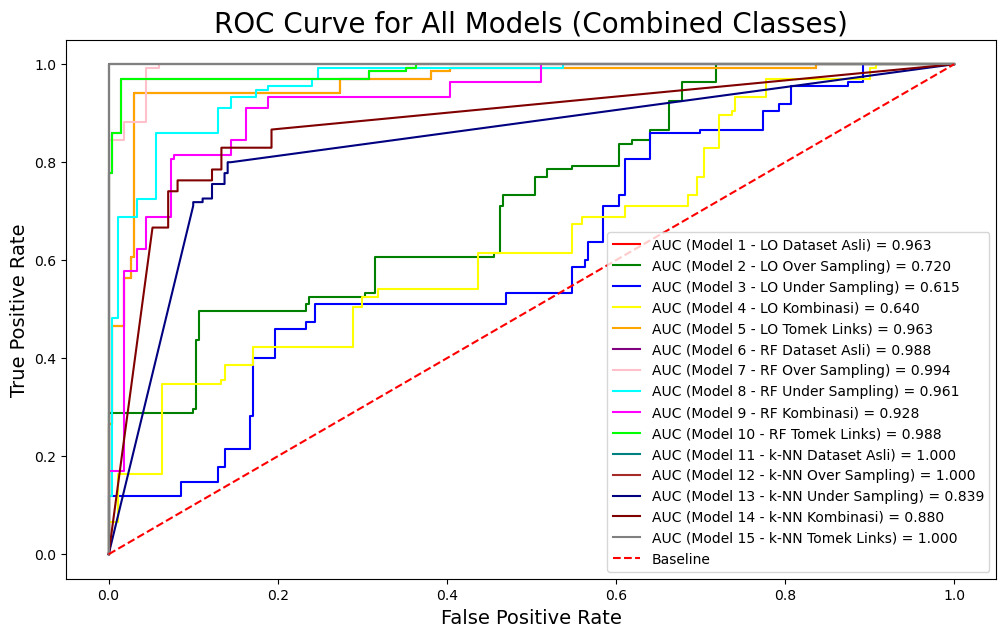

In [31]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

y_bin = label_binarize(ytest, classes=[1, 2, 3])  

# Create classifiers
classifiers = [model1, model2, model3, model4, model5,
               model6, model7, model8, model9, model10,
              model11, model12, model13, model14, model15]  
model_names = ['Model 1 - LO Dataset Asli', 'Model 2 - LO Over Sampling', 'Model 3 - LO Under Sampling', 'Model 4 - LO Kombinasi', 'Model 5 - LO Tomek Links',
              'Model 6 - RF Dataset Asli', 'Model 7 - RF Over Sampling', 'Model 8 - RF Under Sampling', 'Model 9 - RF Kombinasi', 'Model 10 - RF Tomek Links',
              'Model 11 - k-NN Dataset Asli', 'Model 12 - k-NN Over Sampling', 'Model 13 - k-NN Under Sampling', 'Model 14 - k-NN Kombinasi', 'Model 15 - k-NN Tomek Links']

fpr = []
tpr = []
roc_auc = []

for i in range(len(classifiers)):
    classifier = classifiers[i]
    y_score = classifier.predict_proba(xtest)
    
    fpr_model, tpr_model, _ = roc_curve(y_bin.ravel(), y_score.ravel()) 
    roc_auc_model = auc(fpr_model, tpr_model)
    
    fpr.append(fpr_model)
    tpr.append(tpr_model)
    roc_auc.append(roc_auc_model)

plt.figure(figsize=(12, 7))
colors = ["Red", "Green", "Blue", "Yellow", "Orange",
          "Purple", "Pink", "Cyan", "Magenta", "Lime",
          "Teal", "Brown", "Navy", "Maroon", "Grey"]

for i in range(len(classifiers)):
    plt.plot(fpr[i], tpr[i], label=f'AUC ({model_names[i]}) = {roc_auc[i]:.3f}', color=colors[i])

plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Baseline')
plt.title('ROC Curve for All Models (Combined Classes)', size=20)
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend()
plt.show()

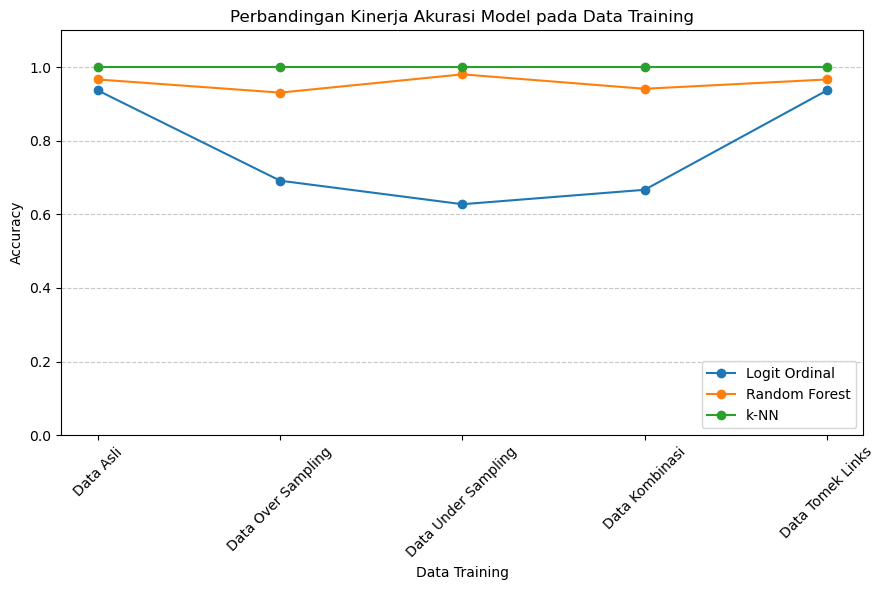

In [32]:
import matplotlib.pyplot as plt

# List nama-nama model
model_names = ["Logit Ordinal", "Random Forest", "k-NN" ]

# List akurasi untuk data training untuk masing-masing model
train_accuracy_asli = [accuracy_score(ytrain, train_predictions1), accuracy_score(ytrain, train_predictions6), accuracy_score(ytrain, train_predictions11)]
train_accuracy_oversampling = [accuracy_score(y_ros, train_predictions2), accuracy_score(y_ros, train_predictions7), accuracy_score(y_ros, train_predictions12)]
train_accuracy_undersampling = [accuracy_score(y_rus, train_predictions3), accuracy_score(y_rus, train_predictions8), accuracy_score(y_rus, train_predictions13)]
train_accuracy_kombinasi = [accuracy_score(y_comb, train_predictions4), accuracy_score(y_comb, train_predictions9), accuracy_score(y_comb, train_predictions14)]
train_accuracy_tomeklinks = [accuracy_score(y_tom, train_predictions5), accuracy_score(y_tom, train_predictions10), accuracy_score(y_tom, train_predictions15)]

# Plot
plt.figure(figsize=(9, 6))
for i in range(len(model_names)):
    plt.plot(["Data Asli", "Data Over Sampling", "Data Under Sampling", "Data Kombinasi", "Data Tomek Links"],
             [train_accuracy_asli[i],train_accuracy_oversampling[i], train_accuracy_undersampling[i],
              train_accuracy_kombinasi[i], train_accuracy_tomeklinks[i] ], marker = 'o', label = model_names[i])

plt.xlabel('Data Training')
plt.ylabel('Accuracy')
plt.title('Perbandingan Kinerja Akurasi Model pada Data Training')
plt.ylim(0, 1.1)  # Sesuaikan batas y-axis sesuai kebutuhan
plt.legend(loc = 'lower right')
plt.xticks(rotation = 45)  # Untuk memutar label sumbu x agar lebih mudah dibaca
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)

plt.tight_layout()

# Tampilkan plot
plt.show()

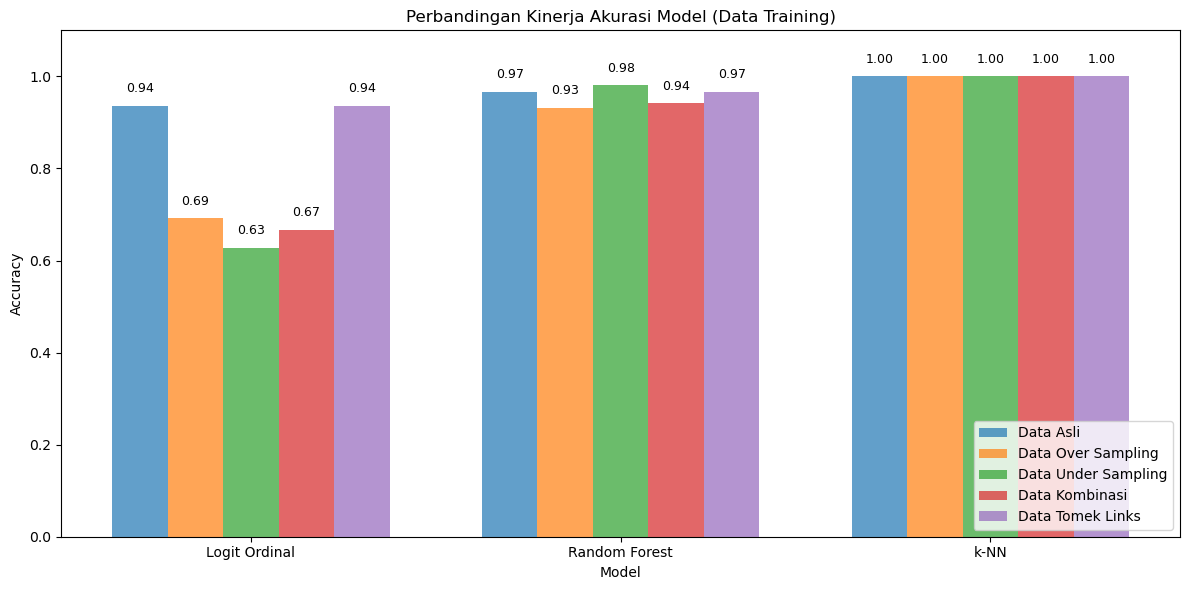

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# List nama-nama model
model_names = ["Logit Ordinal", "Random Forest", "k-NN" ]

# List akurasi untuk data training untuk masing-masing model
train_accuracy_asli = [accuracy_score(ytrain, train_predictions1), accuracy_score(ytrain, train_predictions6), accuracy_score(ytrain, train_predictions11)]
train_accuracy_oversampling = [accuracy_score(y_ros, train_predictions2), accuracy_score(y_ros, train_predictions7), accuracy_score(y_ros, train_predictions12)]
train_accuracy_undersampling = [accuracy_score(y_rus, train_predictions3), accuracy_score(y_rus, train_predictions8), accuracy_score(y_rus, train_predictions13)]
train_accuracy_kombinasi = [accuracy_score(y_comb, train_predictions4), accuracy_score(y_comb, train_predictions9), accuracy_score(y_comb, train_predictions14)]
train_accuracy_tomeklinks = [accuracy_score(y_tom, train_predictions5), accuracy_score(y_tom, train_predictions10), accuracy_score(y_tom, train_predictions15)]

# List posisi x untuk setiap jenis data
x_positions = np.arange(len(model_names))

# Lebar batang
bar_width = 0.15

# Plot
plt.figure(figsize=(12, 6))

# Plot model pertama
plt.bar(x_positions - 2 * bar_width, train_accuracy_asli, width=bar_width, label='Data Asli', align='center', alpha=0.7)
plt.bar(x_positions - bar_width, train_accuracy_oversampling, width=bar_width, label='Data Over Sampling', align='center', alpha=0.7)
plt.bar(x_positions, train_accuracy_undersampling, width=bar_width, label='Data Under Sampling', align='center', alpha=0.7)
plt.bar(x_positions + bar_width, train_accuracy_kombinasi, width=bar_width, label='Data Kombinasi', align='center', alpha=0.7)
plt.bar(x_positions + 2 * bar_width, train_accuracy_tomeklinks, width=bar_width, label='Data Tomek Links', align='center', alpha=0.7)

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Perbandingan Kinerja Akurasi Model (Data Training)')
plt.ylim(0, 1.1)
plt.xticks(x_positions, model_names)
plt.legend(loc='upper left')

# Menambahkan label data pada plot
for i in range(len(model_names)):
    plt.text(x_positions[i] - 2 * bar_width, train_accuracy_asli[i] + 0.03, f'{train_accuracy_asli[i]:.2f}', ha='center', fontsize=9)
    plt.text(x_positions[i] - bar_width, train_accuracy_oversampling[i] + 0.03, f'{train_accuracy_oversampling[i]:.2f}', ha='center', fontsize=9)
    plt.text(x_positions[i], train_accuracy_undersampling[i] + 0.03, f'{train_accuracy_undersampling[i]:.2f}', ha='center', fontsize=9)
    plt.text(x_positions[i] + bar_width, train_accuracy_kombinasi[i] + 0.03, f'{train_accuracy_kombinasi[i]:.2f}', ha='center', fontsize=9)
    plt.text(x_positions[i] + 2 * bar_width, train_accuracy_tomeklinks[i] + 0.03, f'{train_accuracy_tomeklinks[i]:.2f}', ha='center', fontsize=9)

# Meletakkan legend di ujung kanan bawah
plt.legend(loc='lower right')

plt.tight_layout()

# Tampilkan plot
plt.show()
# Tampilkan plot
plt.show()

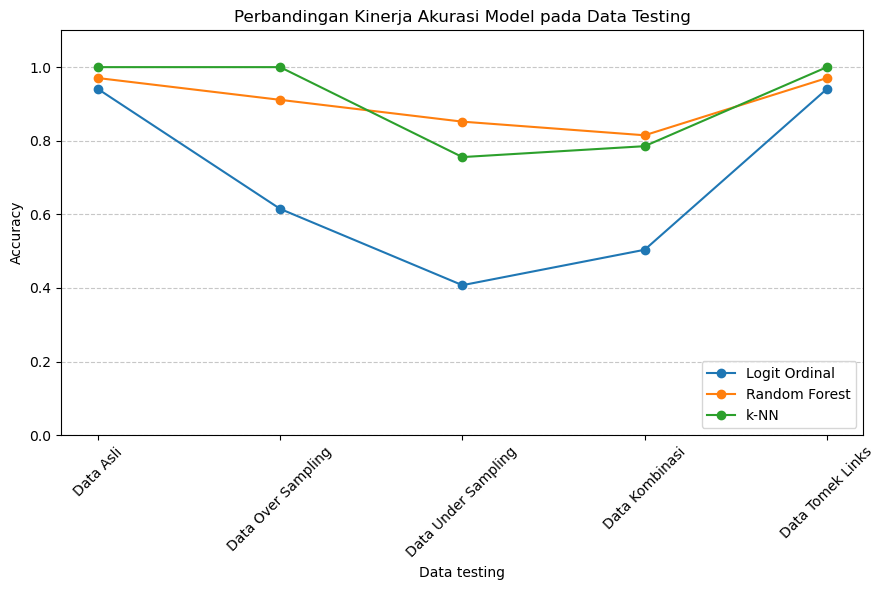

In [34]:
import matplotlib.pyplot as plt

# List nama-nama model
model_names = ["Logit Ordinal", "Random Forest", "k-NN" ]

# List akurasi untuk data testing untuk masing-masing model
test_accuracy_asli = [accuracy_score(ytest, test_predictions1), accuracy_score(ytest, test_predictions6), accuracy_score(ytest, test_predictions11)]
test_accuracy_oversampling = [accuracy_score(ytest, test_predictions2), accuracy_score(ytest, test_predictions7), accuracy_score(ytest, test_predictions12)]
test_accuracy_undersampling = [accuracy_score(ytest, test_predictions3), accuracy_score(ytest, test_predictions8), accuracy_score(ytest, test_predictions13)]
test_accuracy_kombinasi = [accuracy_score(ytest, test_predictions4), accuracy_score(ytest, test_predictions9), accuracy_score(ytest, test_predictions14)]
test_accuracy_tomeklinks = [accuracy_score(ytest, test_predictions5), accuracy_score(ytest, test_predictions10), accuracy_score(ytest, test_predictions15)]

# Plot
plt.figure(figsize=(9, 6))
for i in range(len(model_names)):
    plt.plot(["Data Asli", "Data Over Sampling", "Data Under Sampling", "Data Kombinasi", "Data Tomek Links"],
             [test_accuracy_asli[i],test_accuracy_oversampling[i], test_accuracy_undersampling[i],
              test_accuracy_kombinasi[i], test_accuracy_tomeklinks[i] ], marker = 'o', label = model_names[i])

plt.xlabel('Data testing')
plt.ylabel('Accuracy')
plt.title('Perbandingan Kinerja Akurasi Model pada Data Testing')
plt.ylim(0, 1.1)  # Sesuaikan batas y-axis sesuai kebutuhan
plt.legend(loc = 'lower right')
plt.xticks(rotation = 45)  # Untuk memutar label sumbu x agar lebih mudah dibaca
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)

plt.tight_layout()

# Tampilkan plot
plt.show()

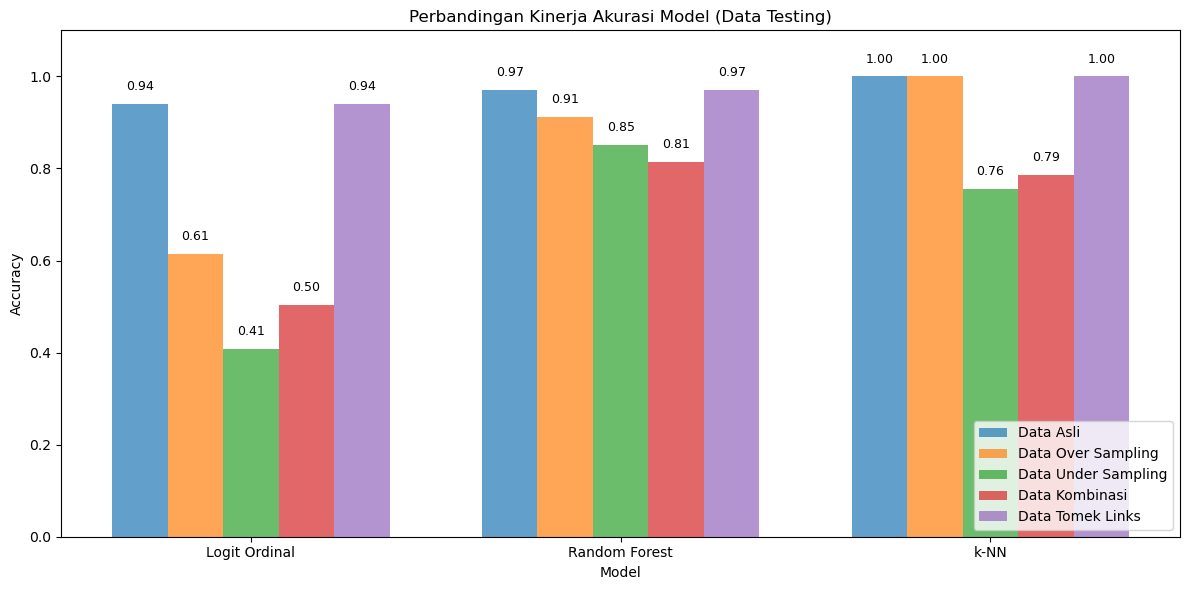

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# List nama-nama model
model_names = ["Logit Ordinal", "Random Forest", "k-NN" ]

# List akurasi untuk data training untuk masing-masing model
train_accuracy_asli = [accuracy_score(ytrain, train_predictions1), accuracy_score(ytrain, train_predictions6), accuracy_score(ytrain, train_predictions11)]
train_accuracy_oversampling = [accuracy_score(y_ros, train_predictions2), accuracy_score(y_ros, train_predictions7), accuracy_score(y_ros, train_predictions12)]
train_accuracy_undersampling = [accuracy_score(y_rus, train_predictions3), accuracy_score(y_rus, train_predictions8), accuracy_score(y_rus, train_predictions13)]
train_accuracy_kombinasi = [accuracy_score(y_comb, train_predictions4), accuracy_score(y_comb, train_predictions9), accuracy_score(y_comb, train_predictions14)]
train_accuracy_tomeklinks = [accuracy_score(y_tom, train_predictions5), accuracy_score(y_tom, train_predictions10), accuracy_score(y_tom, train_predictions15)]

# List posisi x untuk setiap jenis data
x_positions = np.arange(len(model_names))

# Lebar batang
bar_width = 0.15

# Plot
plt.figure(figsize=(12, 6))

# Plot model pertama
plt.bar(x_positions - 2 * bar_width, test_accuracy_asli, width=bar_width, label='Data Asli', align='center', alpha=0.7)
plt.bar(x_positions - bar_width, test_accuracy_oversampling, width=bar_width, label='Data Over Sampling', align='center', alpha=0.7)
plt.bar(x_positions, test_accuracy_undersampling, width=bar_width, label='Data Under Sampling', align='center', alpha=0.7)
plt.bar(x_positions + bar_width, test_accuracy_kombinasi, width=bar_width, label='Data Kombinasi', align='center', alpha=0.7)
plt.bar(x_positions + 2 * bar_width, test_accuracy_tomeklinks, width=bar_width, label='Data Tomek Links', align='center', alpha=0.7)

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Perbandingan Kinerja Akurasi Model (Data Testing)')
plt.ylim(0, 1.1)
plt.xticks(x_positions, model_names)
plt.legend(loc='upper left')

# Menambahkan label data pada plot
for i in range(len(model_names)):
    plt.text(x_positions[i] - 2 * bar_width, test_accuracy_asli[i] + 0.03, f'{test_accuracy_asli[i]:.2f}', ha='center', fontsize=9)
    plt.text(x_positions[i] - bar_width, test_accuracy_oversampling[i] + 0.03, f'{test_accuracy_oversampling[i]:.2f}', ha='center', fontsize=9)
    plt.text(x_positions[i], test_accuracy_undersampling[i] + 0.03, f'{test_accuracy_undersampling[i]:.2f}', ha='center', fontsize=9)
    plt.text(x_positions[i] + bar_width, test_accuracy_kombinasi[i] + 0.03, f'{test_accuracy_kombinasi[i]:.2f}', ha='center', fontsize=9)
    plt.text(x_positions[i] + 2 * bar_width, test_accuracy_tomeklinks[i] + 0.03, f'{test_accuracy_tomeklinks[i]:.2f}', ha='center', fontsize=9)

# Meletakkan legend di ujung kanan bawah
plt.legend(loc='lower right')

plt.tight_layout()

# Tampilkan plot
plt.show()
# Tampilkan plot
plt.show()

# Hybrid Ensemble

In [88]:
#gabungkan 3 model terbaik dari masing masing metode
lo= {accuracy_score(ytest, test_predictions1): test_predictions1, accuracy_score(ytest, test_predictions2):test_predictions2, accuracy_score(ytest, test_predictions3):test_predictions3, accuracy_score(ytest, test_predictions4):test_predictions4, accuracy_score(ytest, test_predictions5):test_predictions5}
rf= {accuracy_score(ytest, test_predictions6): test_predictions6, accuracy_score(ytest, test_predictions7):test_predictions7, accuracy_score(ytest, test_predictions8):test_predictions8, accuracy_score(ytest, test_predictions9):test_predictions9, accuracy_score(ytest, test_predictions10):test_predictions10}
knn= {accuracy_score(ytest, test_predictions11): test_predictions11, accuracy_score(ytest, test_predictions12):test_predictions12, accuracy_score(ytest, test_predictions13):test_predictions13, accuracy_score(ytest, test_predictions14):test_predictions14, accuracy_score(ytest, test_predictions15):test_predictions15}

df1 = pd.DataFrame({'Model Logit Ordinal': lo[max(lo.keys())]})
df2 = pd.DataFrame({'Model Random Forest': rf[max(rf.keys())]})
df3 = pd.DataFrame({'Model k-NN': knn[max(knn.keys())]})

ensemble_df= pd.concat([df1, df2, df3], axis = 1)
ensemble_df = ensemble_df.rename_axis('record', axis="columns")
print(ensemble_df)

record  Model Logit Ordinal  Model Random Forest  Model k-NN
0                         1                    1           1
1                         2                    2           2
2                         2                    2           2
3                         1                    1           1
4                         1                    1           1
..                      ...                  ...         ...
130                       2                    2           2
131                       1                    1           1
132                       1                    1           1
133                       2                    2           2
134                       2                    2           2

[135 rows x 3 columns]


In [89]:
# Fungsi untuk mengambil label yang paling banyak muncul
def most_frequent_label(row):
    labels = [row['Model Logit Ordinal'], row['Model Random Forest'], row['Model k-NN']]
    label_counts = {}
    
    # Menghitung jumlah kemunculan setiap label
    for label in labels:
        if label in label_counts:
            label_counts[label] += 1
        else:
            label_counts[label] = 1
    
    # Mengambil label yang paling banyak muncul atau dari Model Random Forest jika semua label berbeda
    most_frequent = max(labels, key=lambda x: label_counts[x])
    return most_frequent

# Menambahkan kolom baru "Most Frequent Label"
ensemble_df['Model Ensemble'] = ensemble_df.apply(most_frequent_label, axis=1)

# Menampilkan DataFrame dengan kolom baru
print(ensemble_df)

record  Model Logit Ordinal  Model Random Forest  Model k-NN  Model Ensemble
0                         1                    1           1               1
1                         2                    2           2               2
2                         2                    2           2               2
3                         1                    1           1               1
4                         1                    1           1               1
..                      ...                  ...         ...             ...
130                       2                    2           2               2
131                       1                    1           1               1
132                       1                    1           1               1
133                       2                    2           2               2
134                       2                    2           2               2

[135 rows x 4 columns]


In [90]:
print('Kinerja Model Ensemble'.center(55, '='))
print('\nAkurasi:', accuracy_score(ytest, ensemble_df['Model Ensemble']))
print('\nLaporan Klasifikasi:\n', classification_report(ytest, ensemble_df['Model Ensemble']))
print('Matriks Konfusi:\n', confusion_matrix(ytest, ensemble_df['Model Ensemble']))

=================Kinerja Model Ensemble================

Akurasi: 0.9703703703703703

Laporan Klasifikasi:
               precision    recall  f1-score   support

           1       0.99      1.00      0.99        92
           2       0.93      1.00      0.96        39
           3       0.00      0.00      0.00         4

    accuracy                           0.97       135
   macro avg       0.64      0.67      0.65       135
weighted avg       0.94      0.97      0.96       135

Matriks Konfusi:
 [[92  0  0]
 [ 0 39  0]
 [ 1  3  0]]


C:\Users\MUFFID\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MUFFID\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MUFFID\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [94]:
import pandas as pd

# Data dari DataFrame
data = ensemble_df

# List nama-nama model
model_names = data.columns

# List label x
labels_x = data['Model k-NN'].unique()  # Misalnya, menggunakan model k-NN sebagai referensi

# Inisialisasi DataFrame untuk tabel
table_data = {'Grade': labels_x}

# Loop melalui setiap model
for model in model_names:
    # Ambil data untuk model tertentu
    model_data = data[model]
    
    # Hitung jumlah kemunculan setiap label di model tertentu
    label_counts = [model_data[model_data == label].count() for label in labels_x]
    
    # Tambahkan data jumlah label ke dalam DataFrame
    table_data[model] = label_counts

# Buat DataFrame untuk tabel dengan label x sebagai "Grade"
table_df = pd.DataFrame(table_data)

# Tampilkan tabel
print(table_df)


   Grade  Model Logit Ordinal  Model Random Forest  Model k-NN  Model Ensemble
0      1                   97                   93          92              93
1      2                   38                   42          39              42
2      3                    0                    0           4               0


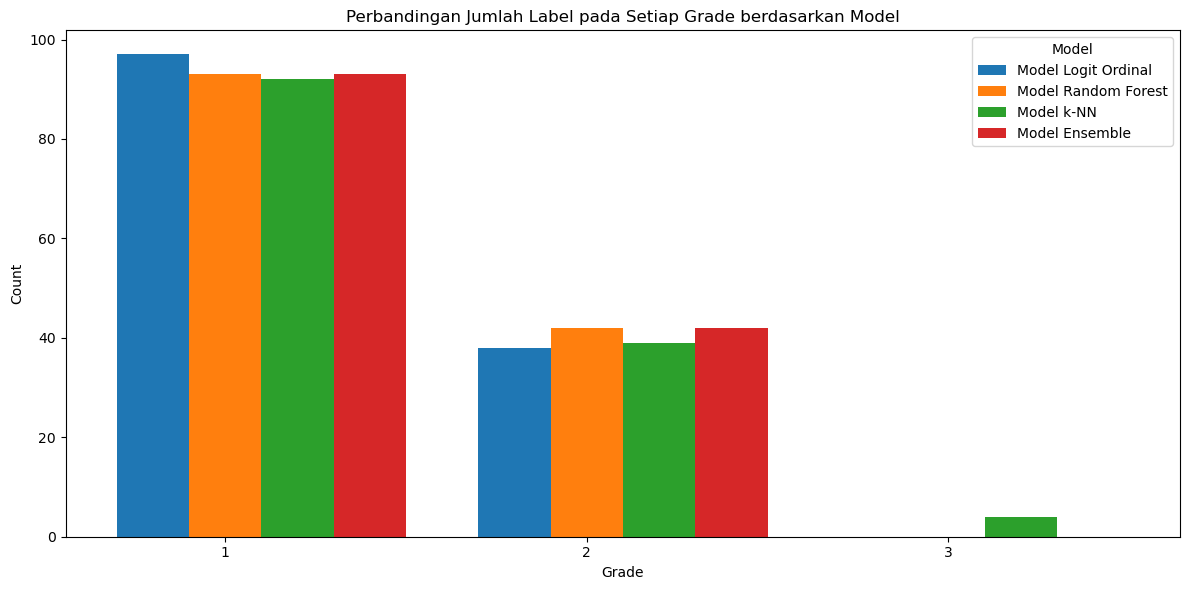

In [95]:
import matplotlib.pyplot as plt
import numpy as np

data = ensemble_df

# List nama-nama model
model_names = data.columns

# List label x
labels_x = ensemble_df['Model k-NN'].unique()

# List posisi x untuk setiap label
x_positions = np.arange(len(labels_x))

# Lebar batang
bar_width = 0.2

# Plot
plt.figure(figsize=(12, 6))

for i, model in enumerate(model_names):
    # Ambil data untuk model tertentu
    model_data = data[model]
    
    # Hitung jumlah kemunculan setiap label di model tertentu
    label_counts = [model_data[model_data == label].count() for label in labels_x]
    
    # Plot bar chart
    plt.bar(x_positions + (i - 1) * bar_width, label_counts, width=bar_width, label=model)

plt.xlabel('Grade')
plt.ylabel('Count')
plt.title('Perbandingan Jumlah Label pada Setiap Grade berdasarkan Model')
plt.xticks(x_positions, labels_x)
plt.legend(loc='upper right', title='Model')

# Tampilkan plot
plt.tight_layout()
plt.show()